In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from utils.save_read_graph import read
from section3.scenario1 import scenario_1
from section3.scenario3 import Scenario3

In [2]:
data_path = './data/'
network_path = './networks/p400R400000/'
cn, x, y = read(network_path)
x = {int(k): v for k, v in x.items() }
df_phase = scenario_1(cn, x,visualization=False, metrics=False)



  Year    Stations(unit)    Small(%)    Medium(%)    Large(%)  Demand Satisfied(%)      Yearly Profit(M ton)    Construction Cost(M Euro)    Operations Cost(M Euro)
------  ----------------  ----------  -----------  ----------  ---------------------  ----------------------  ---------------------------  -------------------------
  2025                82        75.6         23.2         1.2  not defined                             4.925                          289                       0
  2030               179        34.6         39.7        25.7  96.6                                   32.218                          361                      26.76
  2035               351        28.5         33.9        37.6  not defined                            87.006                          690                      72.76
  2040               387        17.8         26.6        55.6  70.6                                  126.751                          108                     151.52


#Station by size scenario 1, 1: 62, 2: 71, 3: 46
#Station by size scenario 3, 1: 24, 2: 24, 3: 283
Number of tons covered by our network scenario 1: 370.7985061517199
Number of tons covered by our network scenario 3: 1182.9939895550654
Number of tons sold in profit in our network: 443.7939895550649


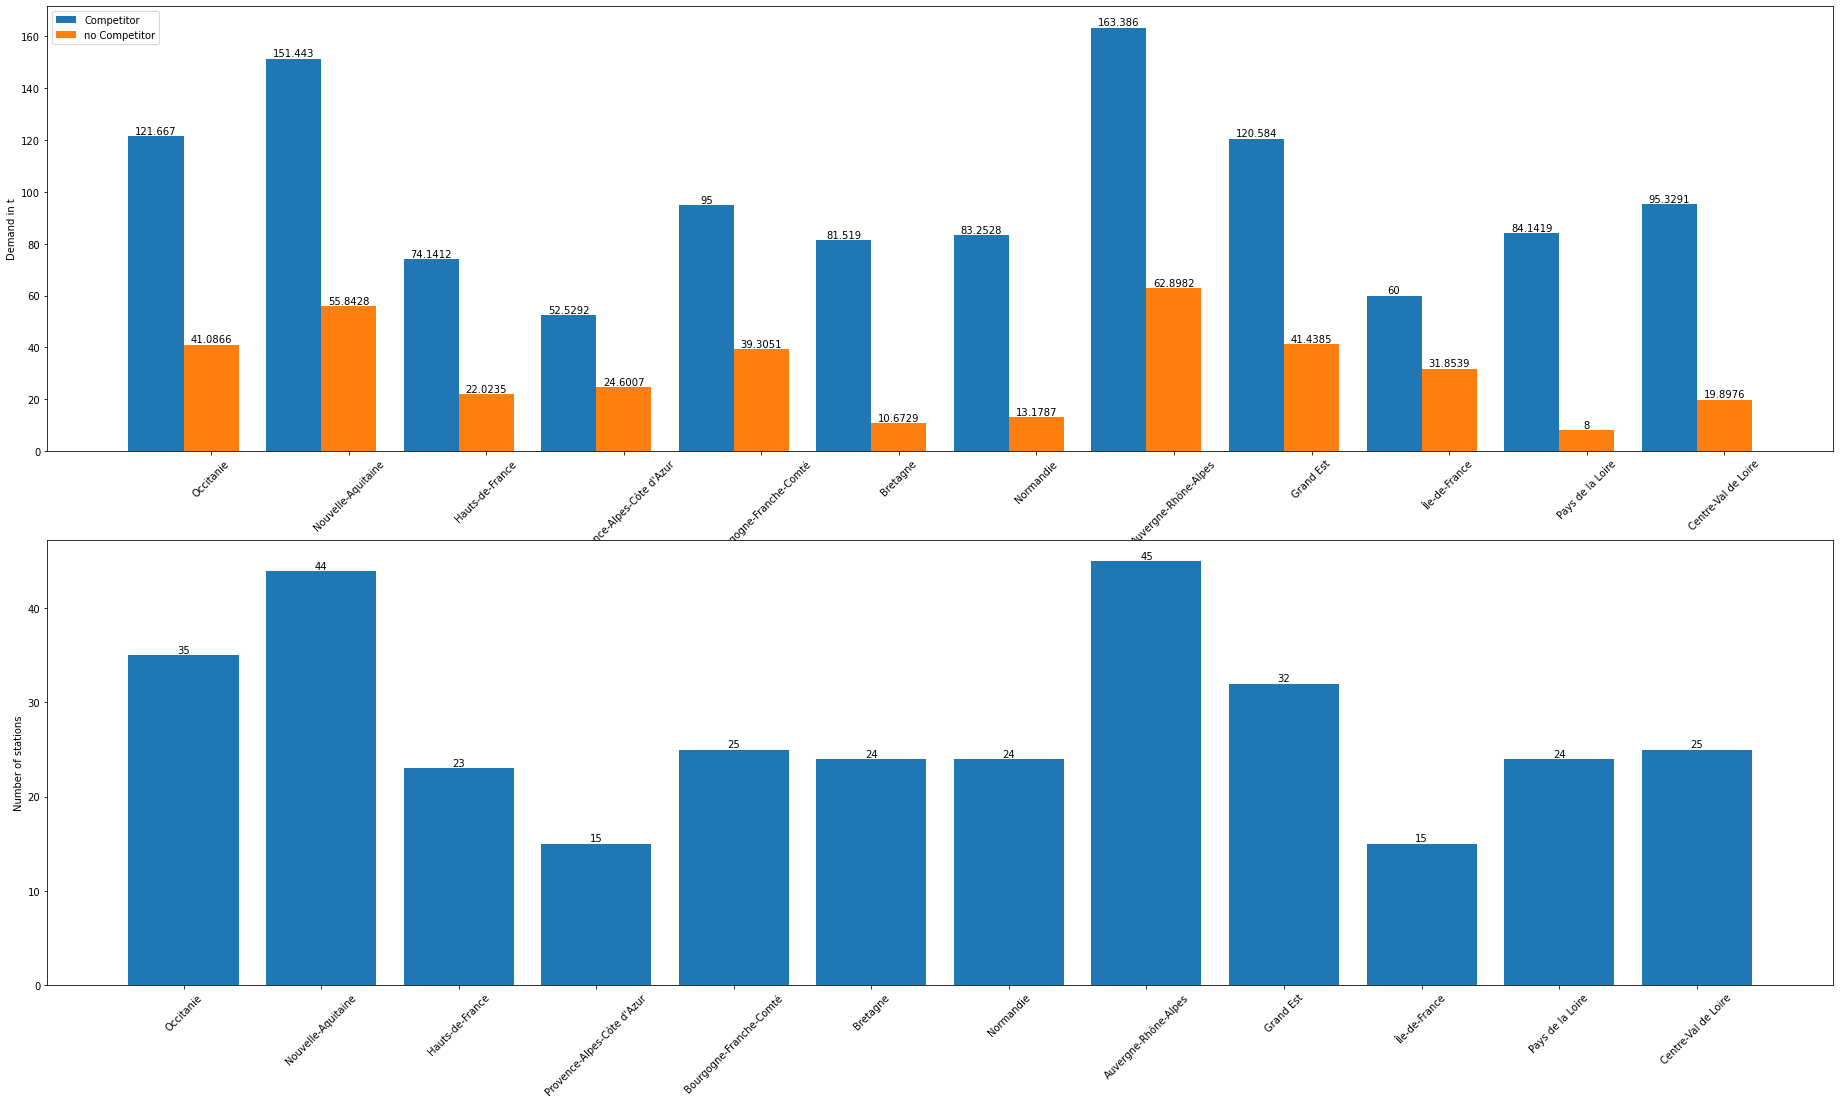

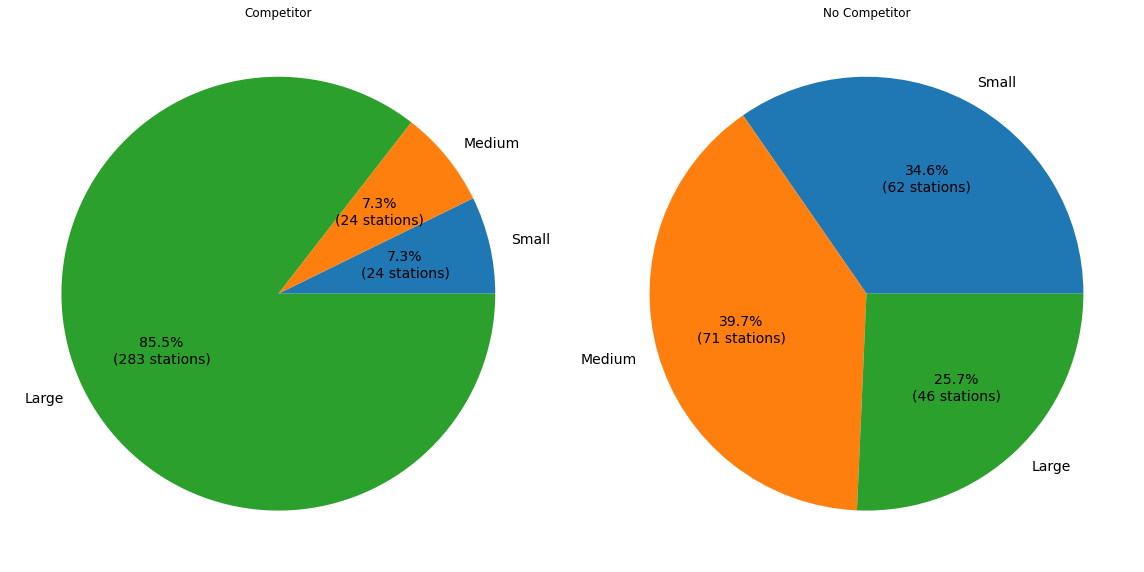

In [4]:
s3 = Scenario3(data_path, cn, x)

s3.summary()


In [7]:
s3.describe()

We plan to deploy 331 H2 stations
The existent player has 327 in France Metropole
113 stations lies within our transportation network
22 stations or  0.066 percent collapse with our deployment plan


#Station by size, 1: 0, 2: 87, 3: 93
Number of tons covered by our network: 393.8995428058016
Number of tons sold in profit in our network: 53.221823987088925
total estimated market demand in our network: 481.7813128272744


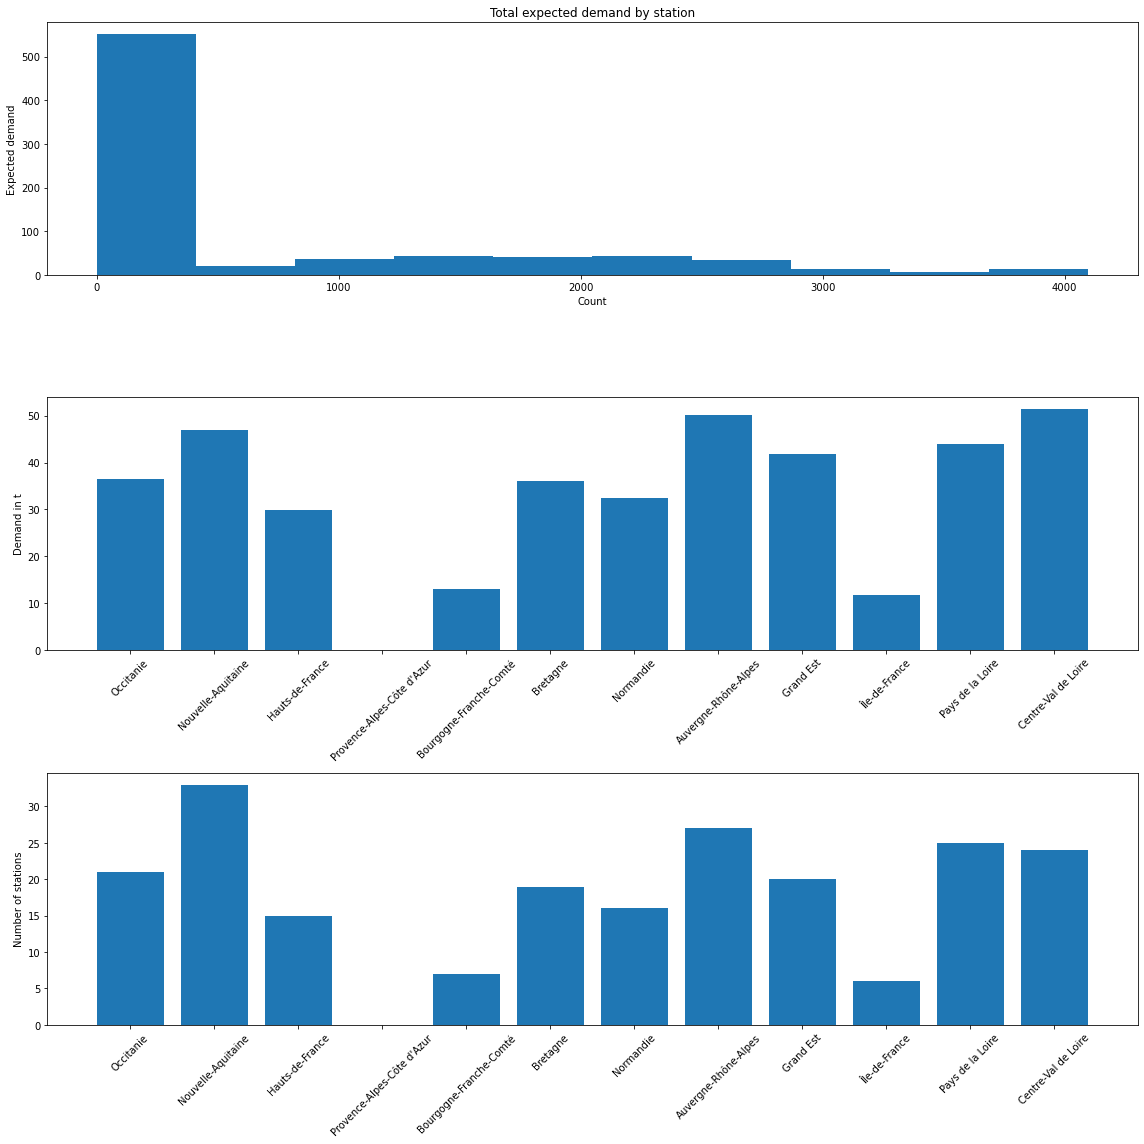

In [79]:
s3.summary()